# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.to_csv('../data/raw/df_raw.csv', index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_n'] = pd.factorize(df[column])[0]

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


In [7]:
#que se puede hacer acá en vez de agregarle el promedio a los que digan 0? en el caso de los pliegues de la piel y la insulina
# se puede predecir la insulina con los datos menos la objetivo que es el outcome
cols_with_zeros = ["sex", "bmi", "smoker", "region", "charges"]

print("🔍 Cantidad de ceros ANTES del reemplazo:\n")
for col in cols_with_zeros:
    count_zeros = (df[col] == 0).sum()
    print(f"{col}: {count_zeros} ceros")

🔍 Cantidad de ceros ANTES del reemplazo:

sex: 0 ceros
bmi: 0 ceros
smoker: 0 ceros
region: 0 ceros
charges: 0 ceros


In [6]:
df.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217,1.484305
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,1.104885
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


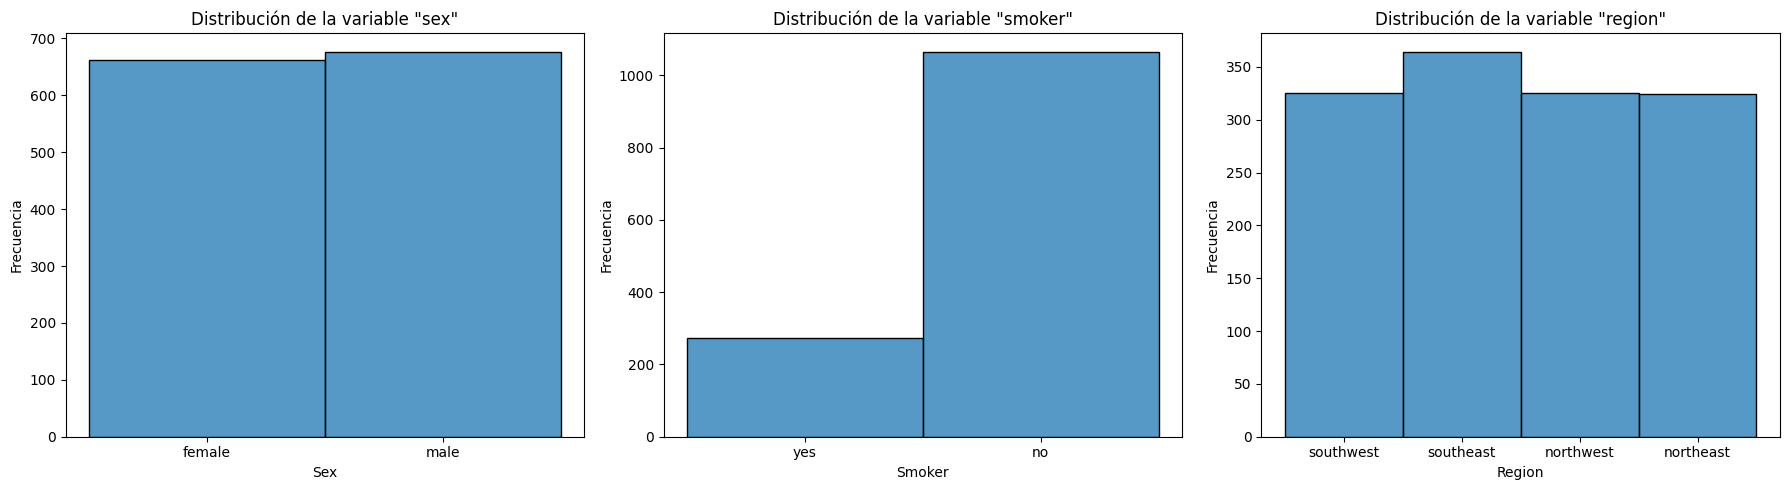

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Lista de variables categóricas
categorical_vars = ['sex', 'smoker', 'region']
titles = ['Distribución de la variable "sex"',
          'Distribución de la variable "smoker"',
          'Distribución de la variable "region"']

# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterar sobre las variables y ejes
for ax, var, title in zip(axes, categorical_vars, titles):
    sns.histplot(ax=ax, data=df, x=var, discrete=True)
    ax.set_title(title)
    ax.set_xlabel(var.capitalize())
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

De aqui podemos ver que la muestra tiene muy parecido el genero, parecida cantidad de hombres y mujeres, la mayoria son no fumadores y viven en areas dispersas por igual.

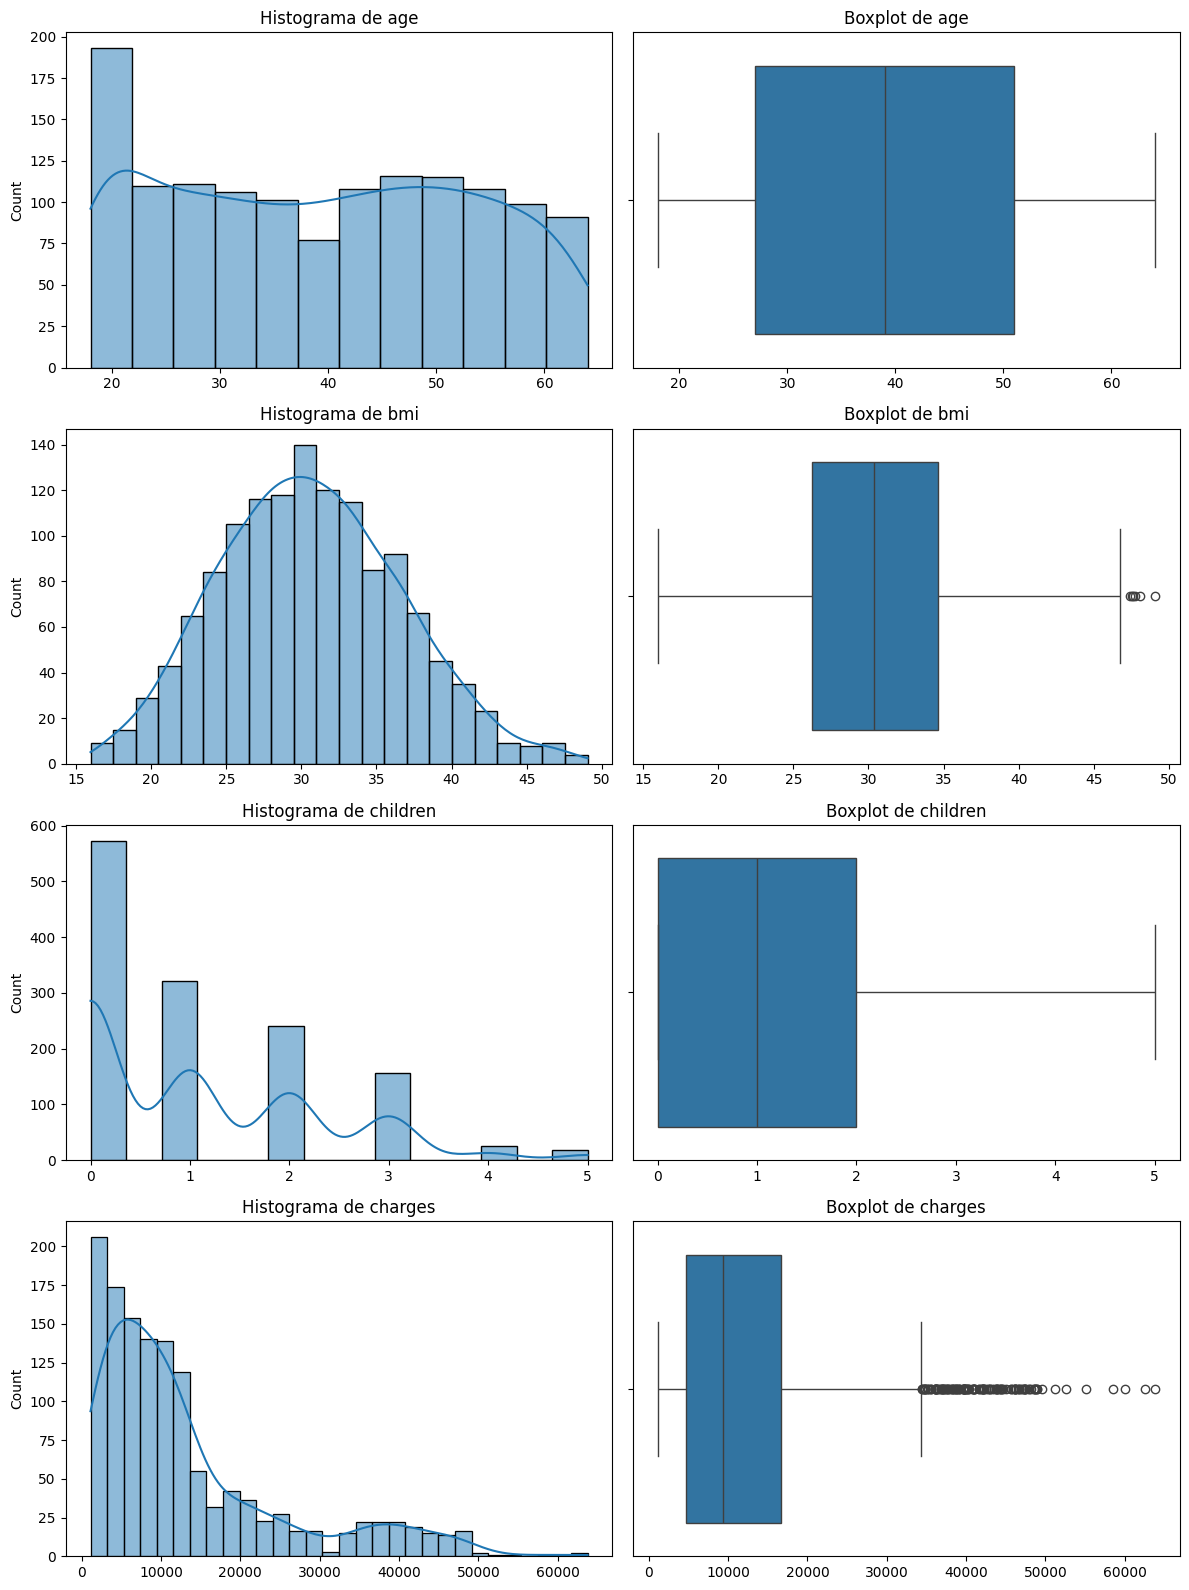

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables numéricas
variables = ['age', 'bmi', 'children', 'charges']

# Crear figura con 2 filas por variable: histograma y boxplot
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 variables × 2 gráficos

# Recorrer cada variable
for idx, var in enumerate(variables):
    # Histograma
    sns.histplot(ax=axes[idx, 0], data=df, x=var, kde=True)
    axes[idx, 0].set_title(f'Histograma de {var}')
    axes[idx, 0].set(xlabel=None)

    # Boxplot
    sns.boxplot(ax=axes[idx, 1], data=df, x=var)
    axes[idx, 1].set_title(f'Boxplot de {var}')
    axes[idx, 1].set(xlabel=None)
    axes[idx, 1].set(ylabel=None)

# Ajustar espacio
plt.tight_layout()
plt.show()

In [17]:
df[df["bmi"] > 50]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n


In [16]:
df = df.drop(index=[847, 1047, 1317])

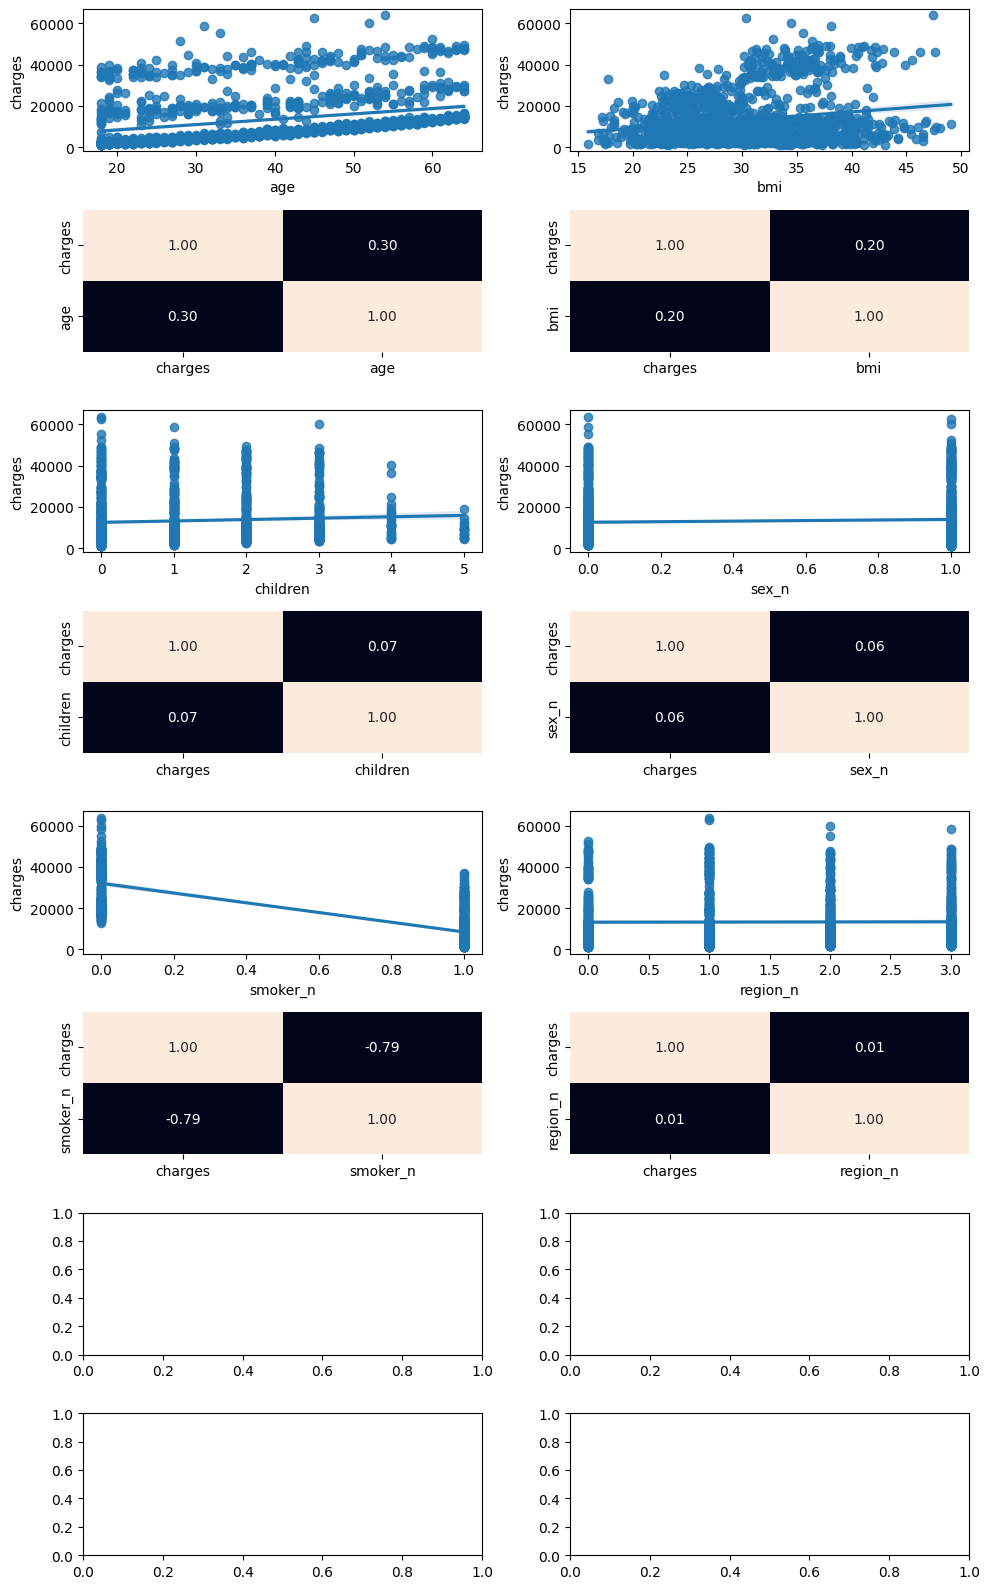

In [19]:
from utils import analisis_numerico_numerico_multivariante

analisis_numerico_numerico_multivariante(df,'charges',[])

podemos ver que el ser si o no fumador, esta directamente relacionado con el precio, si es fumador, es mas alto el cargo

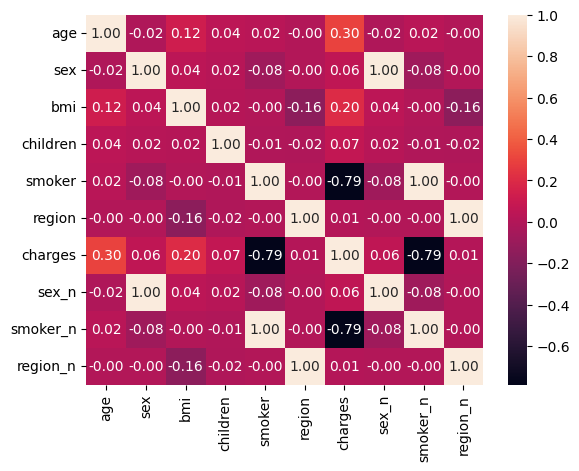

In [20]:
from utils import analisis_numerico_categorico

analisis_numerico_categorico(df)

In [21]:
from utils import analisis_ric

analisis_ric(df)

columna: age limites superior 87.0 e inferior -9.0
columna: sex limites superior 2.5 e inferior -1.5
columna: bmi limites superior 47.11750000000001 e inferior 13.737499999999995
columna: children limites superior 5.0 e inferior -3.0
columna: smoker limites superior 1.0 e inferior 1.0
columna: region limites superior 3.5 e inferior -0.5
columna: charges limites superior 34435.221275 e inferior -13066.415245
columna: sex_n limites superior 2.5 e inferior -1.5
columna: smoker_n limites superior 1.0 e inferior 1.0
columna: region_n limites superior 3.5 e inferior -0.5


In [22]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

para trabajar en las predicciones vamos a solo ocupar las variables numericas

In [23]:
df = df.drop(columns=['sex', 'smoker', 'region'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   bmi       1335 non-null   float64
 2   children  1335 non-null   int64  
 3   charges   1335 non-null   float64
 4   sex_n     1335 non-null   int64  
 5   smoker_n  1335 non-null   int64  
 6   region_n  1335 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 83.4 KB


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables_num = ['age','bmi','children','sex_n', 'smoker_n', 'region_n']

features_escaladas = scaler.fit_transform(df[variables_num])

df_escalado = pd.DataFrame(features_escaladas,index=df.index,columns = variables_num)
df_escalado.head()

,age,bmi,children,sex_n,smoker_n,region_n
0,-1.442826,-0.451236,-0.908677,-1.008274,-1.972336,-1.343672
1,-1.514084,0.524227,-0.079501,0.991794,0.507013,-0.439082
2,-0.801505,0.396270,1.578850,0.991794,0.507013,-0.439082
3,-0.445215,-1.314528,-0.908677,0.991794,0.507013,0.465508
4,-0.516473,-0.288382,-0.908677,0.991794,0.507013,0.465508


In [27]:
df_escalado.describe()

,age,bmi,children,sex_n,smoker_n,region_n
count,1335.000000,1.335000e+03,1.335000e+03,1.335000e+03,1.335000e+03,1.335000e+03
mean,0.000000,7.557833e-16,-1.077790e-16,-3.060390e-17,1.144320e-16,5.555273e-17
std,1.000375,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00,1.000375e+00
min,-1.514084,-2.435396e+00,-9.086771e-01,-1.008274e+00,-1.972336e+00,-1.343672e+00
25%,-0.872762,-7.245979e-01,-9.086771e-01,-1.008274e+00,5.070130e-01,-4.390818e-01
50%,-0.017668,-4.243878e-02,-7.950148e-02,9.917940e-01,5.070130e-01,-4.390818e-01
75%,0.837427,6.621543e-01,7.496741e-01,9.917940e-01,5.070130e-01,4.655081e-01
max,1.763780,3.065083e+00,3.237201e+00,9.917940e-01,5.070130e-01,1.370098e+00


In [28]:
from sklearn.model_selection import train_test_split

X= df_escalado
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

X_train

,age,bmi,children,sex_n,smoker_n,region_n
1284,1.550006,0.944656,-0.079501,0.991794,-1.972336,-1.343672
1113,-0.801505,-0.714627,1.578850,-1.008274,0.507013,0.465508
967,0.338622,-0.872496,-0.079501,0.991794,0.507013,0.465508
598,0.267364,0.329799,0.749674,0.991794,0.507013,-1.343672
170,1.692522,1.803795,-0.908677,0.991794,0.507013,-0.439082
...,...,...,...,...,...,...
1097,-1.229052,0.524227,-0.908677,0.991794,0.507013,-0.439082
1132,1.264974,1.606043,-0.908677,0.991794,0.507013,1.370098
1296,-1.514084,-0.746201,-0.908677,0.991794,0.507013,1.370098
861,-0.088926,-0.434618,1.578850,-1.008274,0.507013,-1.343672


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print(model.intercept_)
print(model.coef_)

13254.725712942465
[ 3586.98637292  1863.69496054   698.25895477  -124.32480478
 -9455.14441117   355.86105899]


In [31]:
y_pred = model.predict(X_test)
y_pred

array([  433.24290365,  5616.79251205, 10433.05370447, 32109.07948675,
        9004.40548483, 13332.6855889 , 30761.98369214,  1109.05192092,
       10889.61050758,  7742.08037603, 10727.16073361, 33562.54311568,
        5215.16782113, 14468.95440559,  1630.08242992,  9259.87722516,
        3622.59906464, 32158.07869956,  6450.89859413,  5437.4834671 ,
        5237.49479711,  7950.14129659, 13960.00526779, 30466.01346935,
        6817.14892608,  5544.76790085,  5503.73459797, 28560.76155648,
       11561.87049392, 14295.06691676,  6470.33699937,  9629.47156927,
       24857.90045482, 11887.66820826, 40210.06794123, 27898.10147258,
        4568.87385358, 31561.61278324,  8470.99868099,  9305.75756964,
        6876.74332381, 17178.67150877, 35343.71740232,  5306.22274848,
        7698.03966881, 26734.98301856,  8353.51693973, 14154.30249236,
        4371.8211557 ,  9272.42795966,  6816.95358596, 11855.96161571,
       14572.23563813,  3467.7305445 , 13940.06930865,  9942.49615415,
      

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test,y_pred)}")
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 31630036.95918689
R2: 0.8031087808656618


In [33]:
from pickle import dump

dump(model,open('../models/linear_regression_default.sav','wb'))